In [7]:
#House sale Data Predication
#Importing libraries
#If error is shown install required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics

In [8]:
house_sale = pd.read_csv('house data.csv')# Take data from kaggle and put directory link

In [9]:
house_sale.head()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [10]:
house_sale.shape

(932, 9)

In [11]:
house_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Taxi_dist      919 non-null    float64
 1   Market_dist    919 non-null    float64
 2   Hospital_dist  931 non-null    float64
 3   Carpet_area    924 non-null    float64
 4   Builtup_area   917 non-null    float64
 5   Parking_type   932 non-null    object 
 6   City_type      932 non-null    object 
 7   Rainfall       932 non-null    int64  
 8   Price_house    932 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.7+ KB


In [12]:
house_sale.isnull().sum()# Find null data in each column

Taxi_dist        13
Market_dist      13
Hospital_dist     1
Carpet_area       8
Builtup_area     15
Parking_type      0
City_type         0
Rainfall          0
Price_house       0
dtype: int64

In [13]:
house_sale['Taxi_dist'].mean()

8229.727965179543

In [14]:
house_sale['Taxi_dist'].fillna(house_sale['Taxi_dist'].mean(), inplace=True)#replace Null Values with mean value of other data respective column
house_sale['Market_dist'].fillna(house_sale['Market_dist'].mean(), inplace=True)
house_sale['Hospital_dist'].fillna(house_sale['Hospital_dist'].mean(), inplace=True)
house_sale['Carpet_area'].fillna(house_sale['Carpet_area'].mean(), inplace=True)
house_sale['Builtup_area'].fillna(house_sale['Builtup_area'].mean(), inplace=True)

In [15]:
house_sale.isnull().sum()#check data again. No null data found

Taxi_dist        0
Market_dist      0
Hospital_dist    0
Carpet_area      0
Builtup_area     0
Parking_type     0
City_type        0
Rainfall         0
Price_house      0
dtype: int64

In [16]:
house_sale.describe() # statistics of all numerical data column 

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Rainfall,Price_house
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,9.320000e+02
mean,8229.727965,11018.752992,13072.092374,1511.862554,1794.924755,785.579399,6.084695e+06
std,2544.035013,2526.097159,2585.066714,787.563962,464.372718,265.546853,5.025364e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,3.000000e+04
25%,6496.000000,9371.750000,11301.750000,1319.750000,1586.750000,600.000000,4.658000e+06
50%,8229.727965,11112.000000,13154.500000,1484.000000,1777.500000,780.000000,5.866000e+06
75%,9918.750000,12653.000000,14803.500000,1652.250000,1979.500000,970.000000,7.187250e+06
max,20662.000000,20945.000000,23294.000000,24300.000000,12730.000000,1560.000000,1.500000e+08


In [17]:
sns.set() #High-level interface for drawing attractive and informative statistical graphics.


E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


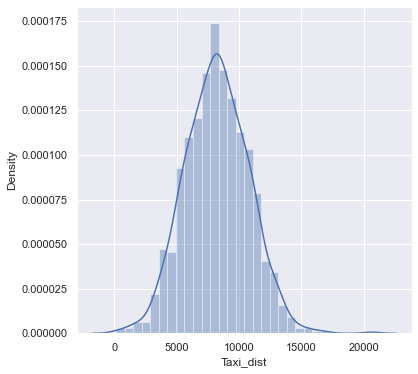

In [18]:
plt.figure(figsize=(6,6)) #Ploting graph for Taxi Dist
sns.distplot(house_sale['Taxi_dist'])
plt.show()

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


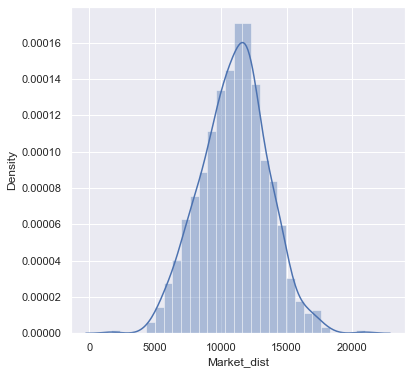

In [19]:
plt.figure(figsize=(6,6))#Ploting graph for Market dist
sns.distplot(house_sale['Market_dist'])
plt.show()

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


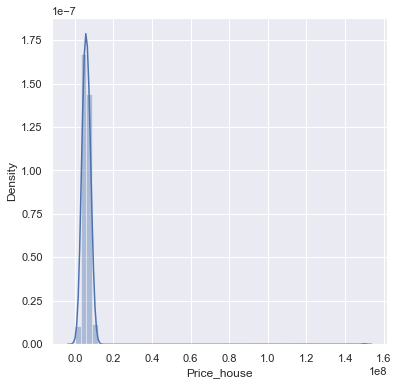

In [20]:
plt.figure(figsize=(6,6))#Ploting graph for Price house
sns.distplot(house_sale['Price_house'])
plt.show()

In [21]:
house_sale.head()#Top five entry are visible of the dataset

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [22]:
house_sale['Parking_type'].value_counts()#checking same type of words

Open            372
Not Provided    227
Covered         188
No Parking      145
Name: Parking_type, dtype: int64

In [23]:
house_sale.replace({'Parking_type': {'No Parking':'Not Provided'}}, inplace=True)#replacing same type of words with one of them

In [24]:
house_sale['Parking_type'].value_counts()

Open            372
Not Provided    372
Covered         188
Name: Parking_type, dtype: int64

In [25]:
house_sale['City_type'].value_counts()

CAT B    365
CAT A    329
CAT C    238
Name: City_type, dtype: int64

In [26]:
encoder = LabelEncoder()#changing the object datatype into integer data type because ML does not allow regression on object data type

In [27]:
house_sale['Parking_type'] = encoder.fit_transform(house_sale['Parking_type'])#changing object data type into integer data type

house_sale['City_type'] = encoder.fit_transform(house_sale['City_type'])


In [28]:
house_sale.tail()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
927,12176.0,8518.0,15673.0,1582.0,1910.0,0,2,1080,6639000
928,7214.0,8717.0,10553.0,1387.0,1663.0,2,0,850,8208000
929,7423.0,11708.0,13220.0,1200.0,1436.0,2,0,1060,7644000
930,15082.0,14700.0,19617.0,1299.0,1560.0,2,1,770,9661000
931,9297.0,12537.0,14418.0,1174.0,1429.0,0,2,1110,5434000


In [29]:
X = house_sale.drop(columns='Price_house', axis=1)#droping  house price column from the dataset
Y = house_sale['Price_house']#putting  House price(output) column in Y axis

In [30]:
print(X)

     Taxi_dist  Market_dist  Hospital_dist  Carpet_area  Builtup_area  \
0       9796.0       5250.0        10703.0       1659.0        1961.0   
1       8294.0       8186.0        12694.0       1461.0        1752.0   
2      11001.0      14399.0        16991.0       1340.0        1609.0   
3       8301.0      11188.0        12289.0       1451.0        1748.0   
4      10510.0      12629.0        13921.0       1770.0        2111.0   
..         ...          ...            ...          ...           ...   
927    12176.0       8518.0        15673.0       1582.0        1910.0   
928     7214.0       8717.0        10553.0       1387.0        1663.0   
929     7423.0      11708.0        13220.0       1200.0        1436.0   
930    15082.0      14700.0        19617.0       1299.0        1560.0   
931     9297.0      12537.0        14418.0       1174.0        1429.0   

     Parking_type  City_type  Rainfall  
0               2          1       530  
1               1          1       210  


In [31]:
print(Y)

0      6649000
1      3982000
2      5401000
3      5373000
4      4662000
        ...   
927    6639000
928    8208000
929    7644000
930    9661000
931    5434000
Name: Price_house, Length: 932, dtype: int64


In [32]:
#Evaluation

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)#dividing X and Y into train and test data set

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(932, 8) (745, 8) (187, 8)


In [35]:
regressor = XGBRegressor()#calling XGBRegressor.

In [36]:
regressor.fit(X_train, Y_train)#fitting training data set

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
training_data_prediction = regressor.predict(X_train)# check prediction of train data set

In [38]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)# find r2 scored using actual output and prediction

In [39]:
print('R Squared value = ', r2_train)

R Squared value =  0.9997433193198532


In [40]:
test_data_prediction = regressor.predict(X_test)# check prediction of test data set

In [41]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)#find r2 scored using actual output and prediction

In [42]:
print('R Squared value = ', r2_test)

R Squared value =  0.4455483117901182


In [43]:
print(test_data_prediction[0:5])#expected sales prediction

[7363804.5 7716462.5 5979490.  6175803.5 4922339.5]


In [44]:
X_test.head()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall
501,8558.0,13467.0,15079.0,1244.0,1480.0,2,0,860
121,10106.0,13805.0,16769.0,1909.0,2287.0,1,1,1210
741,11849.0,9005.0,14370.0,1360.0,1612.0,2,1,490
458,13925.0,14473.0,17746.0,1513.0,1820.0,2,1,520
739,10073.0,10474.0,13497.0,1247.0,1497.0,2,1,590


In [45]:
Y_test.head()#actual sales

501    9353000
121    4683000
741    6108000
458    6602000
739    2833000
Name: Price_house, dtype: int64

In [46]:
from sklearn.ensemble import AdaBoostRegressor #using different regression model to check which model is better 
from sklearn.datasets import make_regression

In [47]:
Adaregressor = AdaBoostRegressor()#calling AdaboostRegressor.

In [48]:
Adaregressor.fit(X_train, Y_train)

AdaBoostRegressor()

In [49]:
training_data_prediction = Adaregressor.predict(X_train)

In [50]:
Adar2_train = metrics.r2_score(Y_train, training_data_prediction)

In [51]:
print('R Squared value = ', Adar2_train)

R Squared value =  0.9526814307906761


In [52]:
test_data_prediction = Adaregressor.predict(X_test)

In [53]:
Adar2_test = metrics.r2_score(Y_test, test_data_prediction)

In [54]:
print('R Squared value = ', Adar2_test)

R Squared value =  0.47890782026332746
